In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [2]:
!ls /content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/*.py
!ls /content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/utils/*.py

'''
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/NQTM.py'
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/NQTM_v2.py'
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/run_NQTM.py'
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/run_NQTM_v2.py'
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/utils/preprocess.py'
!cat '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/utils/TU.py'
'''

import sys
sys.path.append('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere')

%cd /content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/

/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/NQTM.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/NQTM_v2.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/preprocess.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/run_NQTM.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/run_NQTM_v2.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/utils/setup.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/NQTM-master/utils/TU.py
/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere


In [3]:
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

#1. Read the dataset and add columns


##1.1 Read

In [ ]:

path_incels_csv = "/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/reddit/Incels.csv"
path_braincels_csv = "/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/reddit/Braincels.csv"
path_incels_is_csv = "/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_is.csv"
path_red_pill_csv = '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/reddit/TheRedPill.csv'

path_incels_is = '/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels.ndjson'

path_incels_all = "/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_total_data.csv"

#df_incels_csv = pd.read_csv(path_incels_csv, parse_dates=['date']).reset_index(drop=True, inplace=False)
#df_braincels_csv = pd.read_csv(path_braincels_csv, parse_dates=['date']).reset_index(drop=True, inplace=False)
#df_incels_is = pd.read_csv(path_incels_is_csv, lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)
#df_red_pill_csv = pd.read_csv(path_red_pill_csv, parse_dates=['date']).reset_index(drop=True, inplace=False)

In [ ]:
df = pd.read_csv(path_incels_all, lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)


In [ ]:
# remove NA values in the datasets, only in the relevant columns !
for i in [df_incels_csv, df_braincels_csv, df_incels_is, df_red_pill_csv]:
    pre = i.shape[0]
    i.dropna(inplace=True, subset=['text_post', 'thread', 'date_post', 'id_post'])
    post = i.shape[0]
    print(f'Pre :{pre} \nPost: {post}\nReduced by {(1 - (post/pre)) * 100}%\n---')

##1.1 Add date columns

In [ ]:

# incels_reddit
df_incels_csv['date'] = pd.to_datetime(df_incels_csv['date_post'], unit='s')
df_incels_csv['date_week'] = pd.to_datetime(df_incels_csv['date_post'], unit='s').dt.date - pd.to_timedelta(7, unit='d')
df_incels_csv['date_bi_weekly'] = pd.to_datetime(df_incels_csv['date_post'], unit='s').dt.date - pd.to_timedelta(14, unit='d')

# braincels
df_braincels_csv['date'] = pd.to_datetime(df_braincels_csv['date_post'], unit='s')
df_braincels_csv['date_week'] = pd.to_datetime(df_braincels_csv['date_post'], unit='s').dt.date - pd.to_timedelta(7, unit='d')
df_braincels_csv['date_bi_weekly'] = pd.to_datetime(df_braincels_csv['date_post'], unit='s').dt.date - pd.to_timedelta(14, unit='d')

# incels_forum
df_incels_is['date'] = pd.to_datetime(df_incels_is['date_post'])
df_incels_is['date_week'] = pd.to_datetime(df_incels_is['date_post']).dt.date - pd.to_timedelta(7, unit='d')
df_incels_is['date_bi_weekly'] = pd.to_datetime(df_incels_is['date_post']).dt.date - pd.to_timedelta(14, unit='d')

# red_pill_talk
df_red_pill_csv['date'] = pd.to_datetime(df_red_pill_csv['date_post'], unit='s')
df_red_pill_csv['date_week'] = pd.to_datetime(df_red_pill_csv['date_post'], unit='s').dt.date - pd.to_timedelta(7, unit='d')
df_red_pill_csv['date_bi_weekly'] = pd.to_datetime(df_red_pill_csv['date_post'], unit='s').dt.date - pd.to_timedelta(14, unit='d')

ValueError: ignored

In [ ]:
df_red_pill_csv.head(10)

In [ ]:
# create the large dataset
df_incels_is_essential = df_red_pill_csv[['author', 'date_post', 'id_post', 'number_post', 'text_post', 'thread', 'date', 'date_week', 'date_bi_weekly']]

df = pd.concat([df_incels_csv, df_braincels_csv, df_incels_is_essential, df_red_pill_csv]).reset_index(drop=True, inplace=False)

In [ ]:
df.head(5)

##1.2 Add popularity column

Number of unique threads:  341661


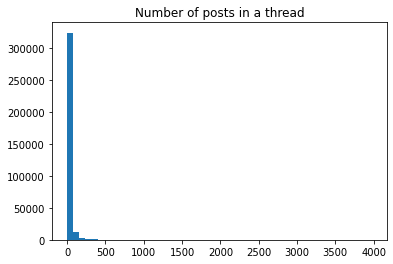

In [ ]:
df_groupby_thread = df.groupby(['thread'])
print('Number of unique threads: ', len(df_groupby_thread.thread.nunique()))

num_post_per_thread = df_groupby_thread['id_post'].nunique()

plt.hist(num_post_per_thread, bins=50)
plt.title('Number of posts in a thread')
plt.show()

In [ ]:
# adding the popularity column
df['popularity'] = df.progress_apply(lambda x: df_groupby_thread.groups[x['thread']].nunique(), axis=1, raw=False, result_type='expand')

  0%|          | 0/10103487 [00:00<?, ?it/s]

In [ ]:
df.head(5)

,author,date_post,id_post,number_post,subreddit,text_post,thread,date,date_week,date_bi_weekly,popularity
0,yeahthatincelblogger,1395042944,20m6pu,0.0,Incels,A blogger TarnishedSophia has questions for th...,t3_20m6pu,2014-03-17 07:55:44,2014-03-10,2014-03-03,1
1,yeahthatincelblogger,1395043047,20m6s4,0.0,Incels,A 48 year-old virgin's blog,t3_20m6s4,2014-03-17 07:57:27,2014-03-10,2014-03-03,1
2,yeahthatincelblogger,1395136982,20phjz,0.0,Incels,Why you’re (probably) a feminist or their usef...,t3_20phjz,2014-03-18 10:03:02,2014-03-11,2014-03-04,1
3,hikkiki,1455499334,45u39c,0.0,Incels,the internet's first asocial network [removed],t3_45u39c,2016-02-15 01:22:14,2016-02-08,2016-02-01,1
4,redgamergatepill,1463453936,4jov5i,1.0,Incels,Hello [removed],t3_4jov5i,2016-05-17 02:58:56,2016-05-10,2016-05-03,2


In [ ]:
df.dtypes

author                    object
date_post                  int64
id_post                   object
number_post              float64
subreddit                 object
text_post                 object
thread                    object
date              datetime64[ns]
date_week                 object
date_bi_weekly            object
popularity                 int64
dtype: object

## 1.3 Add the text_length and pre-processed text column

In [ ]:
import os
import cython
import re
from tqdm.notebook import tqdm
tqdm.pandas()
import numpy as np

texts = []
#cdef list stopwords_list = stopwords.words('english')

# processing method
def process_string(row):
    input_str = row['text_post']

    # tokenize
    try:
        if ("[deleted]" in input_str) or ("[removed]" in input_str):
            return None, None
        
        # remove websites
        input_str = re.sub(r'http\S+', '', str(input_str)).lower()
        #input_str = re.sub('[^a-zA-Z]+', ' ', input_str)

        #encode
        input_str = input_str.encode('ascii', errors='ignore').decode('ascii').strip().replace(r'@\w+', '')

        # remove newlines
        input_str = input_str.replace("\n", "")

        input_str = input_str.split(" ")
    except:
        return None, None

    #get length
    length = len(input_str)

    # filter out short texts
    input_str = " ".join(input_str)
    
    texts.append(input_str)
    return (length, input_str)

df[['text_length', 'processed_text']] = df.progress_apply(lambda x: process_string(x), axis=1, raw=False, result_type='expand')
print(df.shape)
df.dropna(inplace=True, subset=['text_post', 'thread', 'date_post', 'id_post', 'text_length', 'processed_text'])
print(df.shape)


  0%|          | 0/8553266 [00:00<?, ?it/s]

(8553266, 18)
(8553266, 18)


## 1.5 Save datasets

In [ ]:
# save the dataset
df.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_total_data.csv')

In [ ]:
df_incels_csv.to_csv(path_incels_csv)
df_braincels_csv.to_csv(path_braincels_csv)
df_incels_is.to_csv(path_incels_is_csv)
df_red_pill_csv.to_csv(path_red_pill_csv)

# 2. Stats about our dataset

In [ ]:
print(df_incels_csv.shape)
print(df_braincels_csv.shape)
print(df_incels_is.shape)
print(df_red_pill_csv.shape)
print(df.shape)

(1191701, 11)
(2830536, 11)
(2436297, 17)
(3399198, 11)
(8553414, 14)


## 2.1 Posts per day

In [ ]:
# group by day
df_incels_csv_day = df_incels_csv.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_braincels_csv_day = df_braincels_csv.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_incels_is_day = df_incels_is.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_red_pill_day = df_red_pill_csv.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

df_day = df.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

In [ ]:
# group by day
df_incels_csv_month = df_incels_csv.groupby(pd.Grouper(key='date', axis=0, freq='M'))['id_post'].nunique()
df_braincels_csv_month = df_braincels_csv.groupby(pd.Grouper(key='date', axis=0, freq='M'))['id_post'].nunique()
df_incels_is_month = df_incels_is.groupby(pd.Grouper(key='date', axis=0, freq='M'))['id_post'].nunique()
df_red_pill_month = df_red_pill_csv.groupby(pd.Grouper(key='date', axis=0, freq='M'))['id_post'].nunique()

df_month = df.groupby(pd.Grouper(key='date', axis=0, freq='M'))['id_post'].nunique()

In [ ]:
print(df_incels_csv_day.shape, df_braincels_csv_day.shape, df_incels_is_day.shape, df_red_pill_day.shape, df_day.shape)

(1400,) (557,) (589,) (2379,) (2379,)


[]

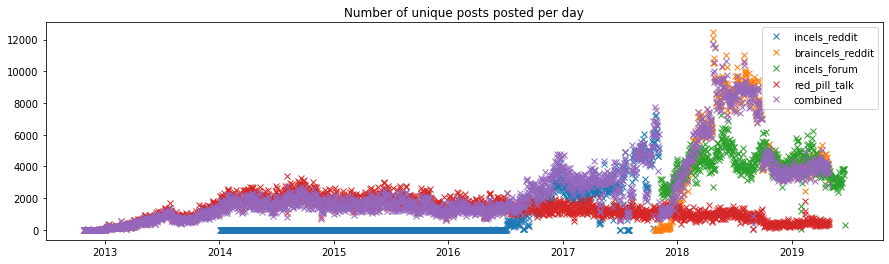

In [ ]:
# plot the number of posts, makes things easier
plt.figure(figsize=(15,4))
plt.plot(df_incels_csv_day, 'x', label='incels_reddit')
plt.plot(df_braincels_csv_day, 'x', label='braincels_reddit')
plt.plot(df_incels_is_day, 'x', label='incels_forum')
plt.plot(df_red_pill_day, 'x', label='red_pill_talk')

plt.plot(df_day, 'x', label='combined')
plt.legend()
plt.title('Number of unique posts posted per day')
plt.plot()

[]

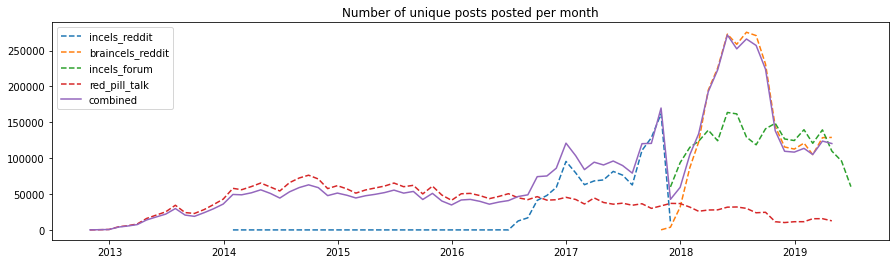

In [ ]:
# plot the number of posts, makes things easier
plt.figure(figsize=(15,4))
plt.plot(df_incels_csv_month, '--', label='incels_reddit')
plt.plot(df_braincels_csv_month, '--', label='braincels_reddit')
plt.plot(df_incels_is_month, '--', label='incels_forum')
plt.plot(df_red_pill_month, '--', label='red_pill_talk')

plt.plot(df_month, label='combined')
plt.legend()
plt.title('Number of unique posts posted per month')
plt.plot()

## 2.2 Text_length per month

In [ ]:
df_groupby_month_sum = df.groupby(pd.Grouper(key='date', freq='1M')).sum()
df_groupby_month_mean = df.groupby(pd.Grouper(key='date', freq='1M')).mean()
df_groupby_month_std = df.groupby(pd.Grouper(key='date', freq='1M')).std()
df_groupby_month = df.groupby(pd.Grouper(key='date', freq='1M'))

Text(0.5, 1.0, 'Mean and std')

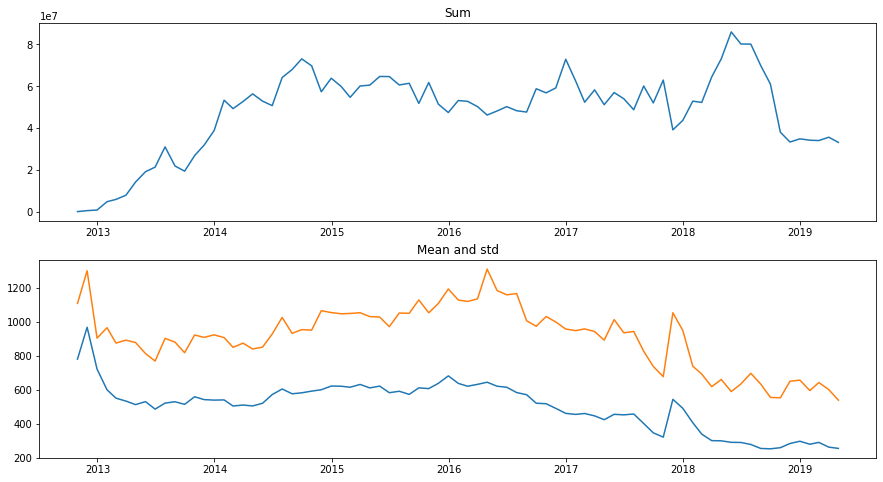

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
mean = df['text_length'].mean
std = df['text_length'].std

ax[0].plot(df_groupby_month_sum.text_length)
ax[0].set_title('Sum')
#ax[0].ticklabel_format(style = 'plain')

ax[1].plot(df_groupby_month_mean.text_length, label='mean')
ax[1].plot(df_groupby_month_std.text_length, label='std. dev.')
'''
ax[1].fill_between(df_groupby_month_mean.text_length, 
                   df_groupby_month_mean.text_length+df_groupby_month_std.text_length, 
                   df_groupby_month_mean.text_length-df_groupby_month_std.text_length, 
                   facecolor='blue', 
                   alpha=0.5)
'''
ax[1].set_title('Mean and std')

(array([1.62933e+05, 4.84000e+02, 7.80000e+01, 2.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.0000e+00, 5.4390e+03, 1.0876e+04, 1.6313e+04, 2.1750e+04,
        2.7187e+04, 3.2624e+04, 3.8061e+04, 4.3498e+04, 4.8935e+04,
        5.4372e+04]),
 <BarContainer object of 10 artists>)

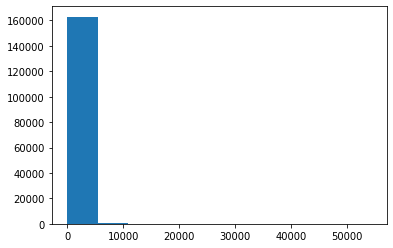

In [ ]:
plt.hist(df['text_length'])

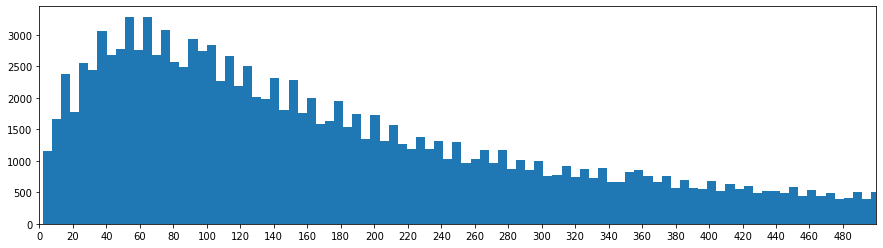

In [ ]:
import numpy as np

plt.figure(figsize=(15,4))
plt.hist(df.text_length, bins=10000)
plt.xlim([0, 500])
plt.xticks(np.arange(0, 500, 20))
plt.ticklabel_format(style = 'plain')
plt.show()

## 2.3 Popularity of threads

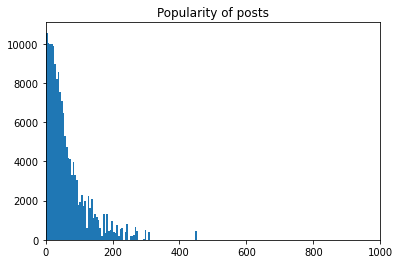

In [ ]:
plt.hist(df['popularity'], bins=500)
plt.xlim([0, 1000])
plt.ticklabel_format(style = 'plain')
plt.title('Popularity of posts')
plt.show()

In [ ]:
res = []
for i in range(0, 200):
    x = df[df['popularity'] > i].shape[0]
    res.append(x)



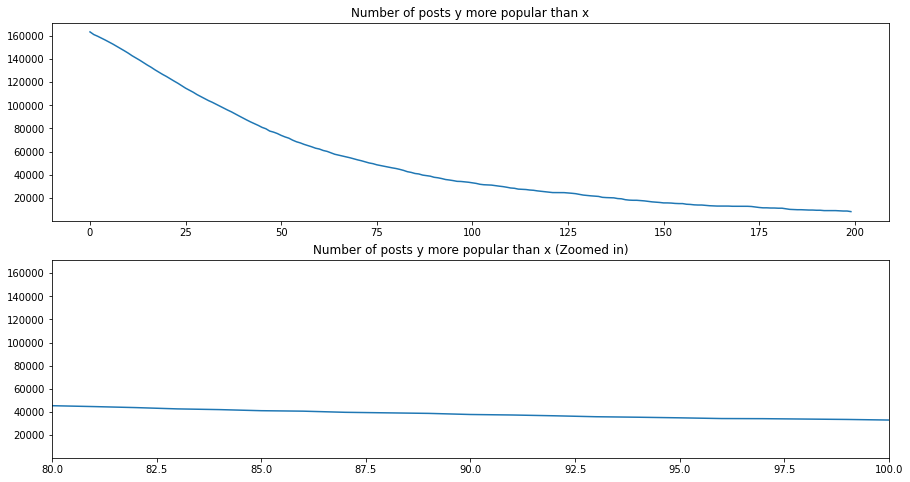

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

ax[0].plot(res)
ax[0].ticklabel_format(style = 'plain')
ax[0].set_title('Number of posts y more popular than x')

ax[1].plot(res)
ax[1].ticklabel_format(style = 'plain')
ax[1].set_xlim([80, 100])
ax[1].set_title('Number of posts y more popular than x (Zoomed in)')
plt.show()

# 3. Dataset reduction

In [46]:
path_incels_all = "/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/csv/incels_redpill_total_data.csv"
#df = pd.read_csv(path_incels_all, lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)

df_year_text_popularity_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/csv/incels_redpill_reduced_data.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)
df_first_two_month_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/csv/incels_redpill_first_two_month.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)

<ipython-input-46-f321e7ed4c84>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year_text_popularity_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/csv/incels_redpill_reduced_data.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)
<ipython-input-46-f321e7ed4c84>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_first_two_month_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/csv/incels_redpill_first_two_month.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)


In [45]:
df_year_text_popularity_reduction.shape

(1212626, 19)

In [48]:
df_year_text_popularity_reduction_incels = df_year_text_popularity_reduction[(df_year_text_popularity_reduction['subreddit'] == 'Incels')]
df_first_two_month_text_popularity_reduction_incels = df_first_two_month_reduction[(df_first_two_month_reduction['subreddit'] == 'Incels')]

print(df_year_text_popularity_reduction_incels.shape, df_first_two_month_text_popularity_reduction_incels.shape)

(184560, 19) (141957, 19)


In [49]:
df_year_text_popularity_reduction_rpt = df_year_text_popularity_reduction[(df_year_text_popularity_reduction['subreddit'] == 'TheRedPill')]
df_first_two_month_text_popularity_reduction_rpt = df_first_two_month_reduction[(df_first_two_month_reduction['subreddit'] == 'TheRedPill')]

print(df_year_text_popularity_reduction_rpt.shape, df_first_two_month_text_popularity_reduction_rpt.shape)

(255834, 19) (57417, 19)


In [50]:
df_year_text_popularity_reduction_incels_is = df_year_text_popularity_reduction[(df_year_text_popularity_reduction['subreddit'] == 'Braincels')]

# didn't exist yet !
#df_first_two_month_text_popularity_reduction_incels_is = df_first_two_month_reduction[(df_first_two_month_reduction['subreddit'] == 'Braincels')]

print(df_year_text_popularity_reduction_incels_is.shape)

(516398, 19) Empty DataFrame
Columns: [Unnamed: 0.5, Unnamed: 0.4, Unnamed: 0.3, Unnamed: 0.2, Unnamed: 0.1, Unnamed: 0, author, date_post, id_post, number_post, subreddit, text_post, thread, date, date_week, date_bi_weekly, popularity, text_length, processed_text]
Index: []


## 1. Reducing

In [ ]:
df.head(10)

In [ ]:
df.shape

(8553266, 19)

In [ ]:
x = df[df['text_post'].str.contains('Women appear to be master manipulators because their biology allows them to hold multiple contradictory')]

In [ ]:
x.iloc[1]['text_post']

'Thank you. Great post. I think men here have women made out to be these master manipulators, but that’s not the case at all, and that’s the genius of it. Women appear to be master manipulators because their biology allows them to hold multiple contradictory beliefs at the same time - that she loves Billy and wants to get fucked by Chad.\n\nIn fact only does their biology allow for this, but it is actually the lynchpin of female sexual strategy. The fact that these beliefs are sincerely held is what makes them so effective. Humans are evolved to have a sixth sense for when we are being lied to by someone we know well. Female cognitive dissonance evolved to defeat the human brain’s lie detecting ability.  \n\n“Jerry, it’s not a lie if you believe it.” \n-George Costanza'

In [ ]:
# reduce to year 01/07/2017 --> 31/06/2018
df_year_reduction = df[(df['date'] > '2017-07-01') & (df['date'] < '2018-06-30')] #~8.5M --> ~2M
df_year_reduction.shape

(2076438, 19)

In [ ]:
df_year_text_reduction = df_year_reduction[df_year_reduction['text_length'] < 256] #~2M --> ~1.3M
df_year_text_reduction.shape

(2041339, 19)

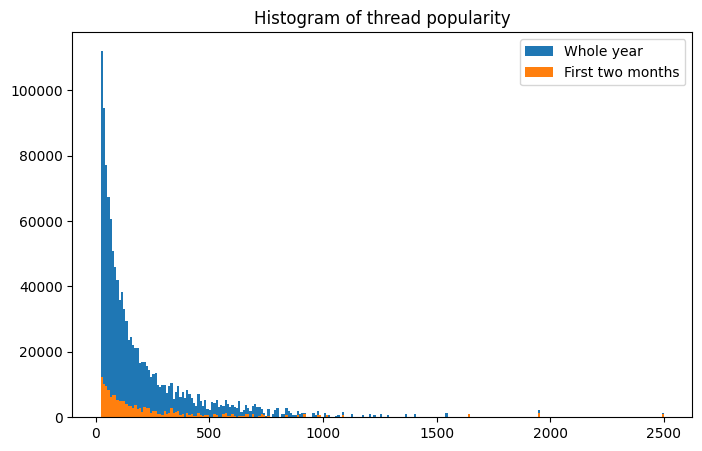

<Figure size 640x480 with 0 Axes>

In [107]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
plt.hist(df_year_text_popularity_reduction['popularity'], bins=250, label='Whole year')
plt.hist(df_first_two_month_reduction['popularity'], bins=250, label='First two months')

#plt.xticks(np.arange(0, 250, 10))
plt.title('Histogram of thread popularity')
plt.legend()
plt.show()
plt.savefig(r"D:\Users\mikad\Downloads\histogram_of_thread_popularity.png")

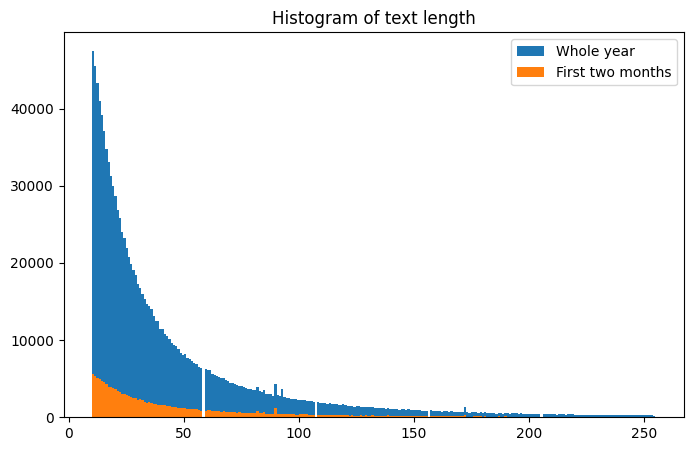

<Figure size 640x480 with 0 Axes>

In [106]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
plt.hist(df_year_text_popularity_reduction['text_length'], bins=250, label='Whole year')
plt.hist(df_first_two_month_reduction['text_length'], bins=250, label='First two months')

#plt.xticks(np.arange(0, 250, 10))
plt.title('Histogram of text length')
plt.legend()
plt.show()
plt.savefig(r"D:\Users\mikad\Downloads\histogram_of_text_length.png")

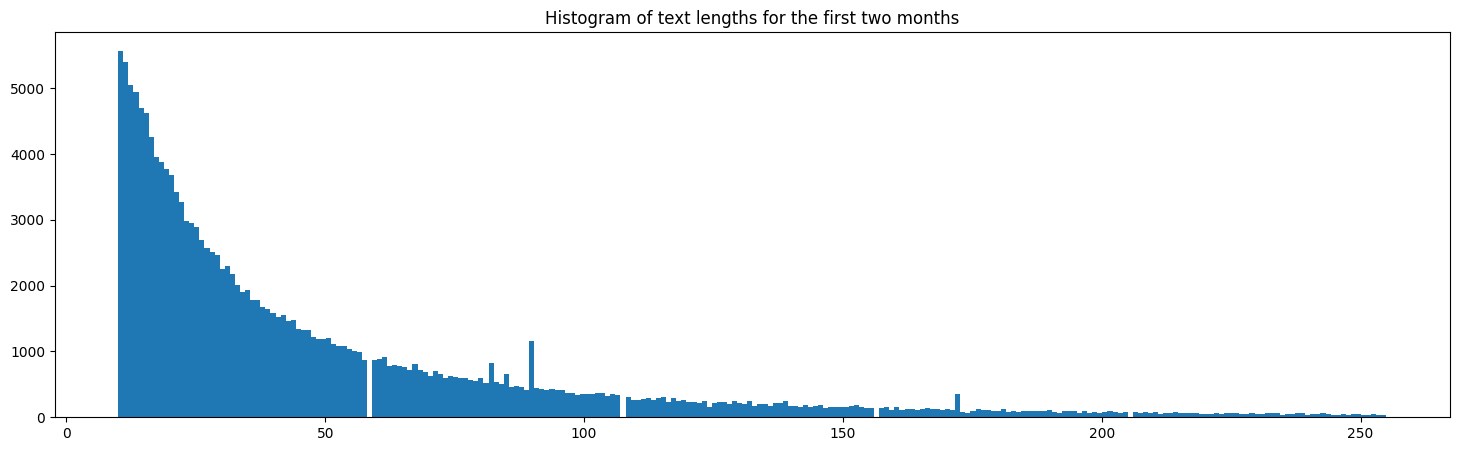

In [85]:
plt.figure(figsize=(18, 5))
plt.hist(df_first_two_month_reduction['text_length'], bins=250)
#plt.xticks(np.arange(0, 250, 10))
plt.title('Histogram of text lengths for the first two months')
plt.show()

In [ ]:
df_year_text_text_reduction = df_year_reduction[(df_year_reduction['text_length'] < 256) & (df_year_reduction['text_length'] >= 10)]
df_year_text_text_reduction.shape

(1438027, 19)

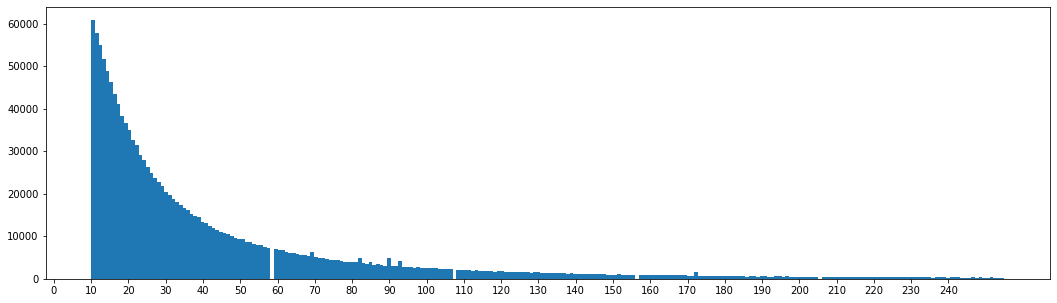

In [ ]:
import seaborn as sns

plt.figure(figsize=(18, 5))
plt.hist(df_year_text_reduction['text_length'], bins=250)
plt.xticks(np.arange(0, 250, 10))
plt.show()

In [ ]:
df_year_text_popularity_reduction = df_year_text_text_reduction[df_year_text_text_reduction['popularity'] > 20]
print(df_year_text_popularity_reduction.shape)

(1212626, 19)


In [ ]:
df_year_text_popularity_reduction.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_reduced_data.csv')

In [ ]:
df_year_text_popularity_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_reduced_data.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)

<ipython-input-4-ff389d186d6f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year_text_popularity_reduction = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_reduced_data.csv', lineterminator='\n', parse_dates=['date']).reset_index(drop=True, inplace=False)


In [ ]:
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_reduced_data.txt', 'w') as f:
    df_year_text_popularity_reduction.progress_apply(lambda x: f.write(x['processed_text'] + '\n'), axis=1, raw=False)

  0%|          | 0/1212626 [00:00<?, ?it/s]

In [ ]:
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_reduced_dates.txt', 'w') as f:
    df_year_text_popularity_reduction.progress_apply(lambda x: f.write(x['date'].now().strftime("%y-%b-%d (%H:%M:%S.%f)") + '\n'), axis=1, raw=False)

  0%|          | 0/1212626 [00:00<?, ?it/s]

In [82]:
# first two months
df_first_two_month_reduction = df_year_text_popularity_reduction[(df_year_text_popularity_reduction['date'] > '2017-07-01') & (df_year_text_popularity_reduction['date'] < '2017-09-01')]
print(df_first_two_month_reduction.shape)

# save to csv
df_first_two_month_reduction.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_two_month.csv')

# save to file
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_two_month_data.txt', 'w') as f:
    df_first_two_month_reduction.progress_apply(lambda x: f.write(x['processed_text'] + '\n'), axis=1, raw=False)

#save dates to file
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_two_month_dates.txt', 'w') as f:
    df_first_two_month_reduction.progress_apply(lambda x: f.write(x['date'].now().strftime("%y-%b-%d (%H:%M:%S.%f)") + '\n'), axis=1, raw=False)


(164909, 19)


  0%|          | 0/164909 [00:00<?, ?it/s]

  0%|          | 0/164909 [00:00<?, ?it/s]

In [ ]:
# first month
df_first_month_reduction = df_year_text_popularity_reduction[(df_year_text_popularity_reduction['date'] > '2017-07-01') & (df_year_text_popularity_reduction['date'] < '2017-08-01')]
print(df_first_month_reduction.shape)


# save csv
df_first_month_reduction.to_csv('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_month.csv')

# save text to file
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_month_data.txt', 'w') as f:
    df_first_month_reduction.progress_apply(lambda x: f.write(x['processed_text'] + '\n'), axis=1, raw=False)

#save dates to file
with open('/content/gdrive/MyDrive/Colab-Notebooks/MLP-Manosphere/data/incels_redpill_first_month_dates.txt', 'w') as f:
    df_first_month_reduction.progress_apply(lambda x: f.write(x['date'].now().strftime("%y-%b-%d (%H:%M:%S.%f)") + '\n'), axis=1, raw=False)


(71494, 19)


  0%|          | 0/71494 [00:00<?, ?it/s]

  0%|          | 0/71494 [00:00<?, ?it/s]

In [ ]:
#df_year_text_popularity_reduction.groupby(pd.Grouper(key='date', freq='1M'))
#df_year_text_popularity_reduction_grouped = df_year_text_popularity_reduction.groupby('thread')['text_length'].nlargest(10)

#df_year_text_popularity_reduction_grouped = df.groupby('thread')['text_length'].nlargest(10).reset_index()

In [ ]:
plt.figure(figsize=(18, 5))
plt.hist(df_year_text_reduction['popularity'], bins=10000)
plt.ticklabel_format(style = 'plain')
plt.xlim([0, 80])
plt.xticks(np.arange(0, 80, 5))
plt.show()

In [ ]:
print(df.shape)
print(df_year_reduction.shape)
print(df_year_text_reduction.shape)
print(df_year_text_text_reduction.shape)
print(df_year_text_popularity_reduction.shape)

(8553414, 14)
(2076477, 14)
(1366002, 14)
(1236507, 14)


## 2.2 Stats

In [53]:
import seaborn as sns

### 2.2.1 Nunique posts

In [51]:
# number of unique posts per day
#df_day = df.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

#total
df_year_text_popularity_reduction_day = df_year_text_popularity_reduction.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_first_two_month_reduction_day = df_first_two_month_reduction.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

# per group
#incels
df_incels_year_text_popularity_reduction_day = df_year_text_popularity_reduction_incels.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_incels_first_two_month_reduction_day = df_first_two_month_text_popularity_reduction_incels.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

#incels.is
df_incels_is_year_text_popularity_reduction_day = df_year_text_popularity_reduction_incels_is.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
#df_incels_is_first_two_month_reduction_day = df_first_two_month_reduction.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

#rpt
df_rpt_year_text_popularity_reduction_day = df_year_text_popularity_reduction_rpt.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()
df_rpt_first_two_month_reduction_day = df_first_two_month_text_popularity_reduction_rpt.groupby(pd.Grouper(key='date', axis=0, freq='D'))['id_post'].nunique()

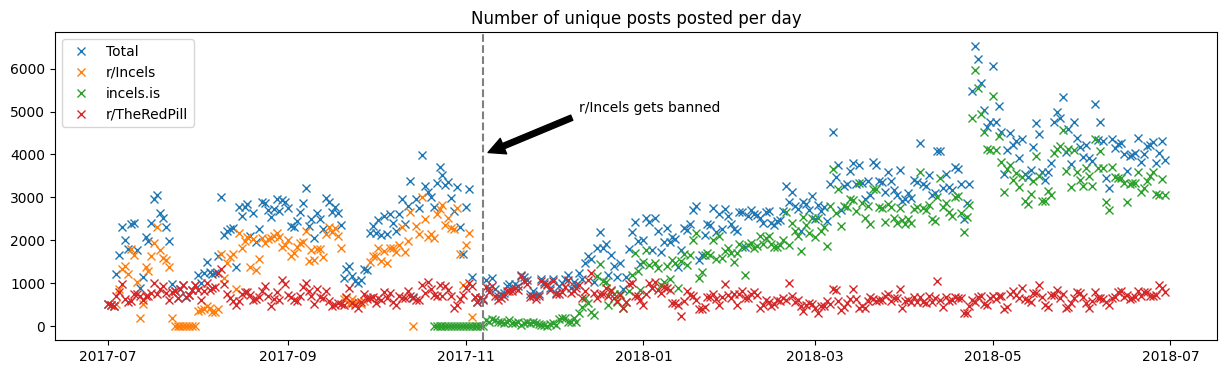

In [108]:
import datetime as dt

# plot the number of posts, makes things easier
plt.figure(figsize=(15,4))
plt.plot(df_year_text_popularity_reduction_day, 'x', label='Total')

plt.plot(df_incels_year_text_popularity_reduction_day, 'x', label='r/Incels')
plt.plot(df_incels_is_year_text_popularity_reduction_day, 'x', label='incels.is')
plt.plot(df_rpt_year_text_popularity_reduction_day, 'x', label='r/TheRedPill')
plt.axvline(dt.datetime(2017, 11, 7), color='gray', linestyle='--')

plt.annotate('r/Incels gets banned', xy=(dt.datetime(2017, 11, 7), 4000), xytext=(dt.datetime(2017, 12, 10), 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.title('Number of unique posts posted per day')
plt.plot()
plt.savefig(r"D:\Users\mikad\Downloads\num_posts_per_day.png")